<a href="https://colab.research.google.com/github/cromi0256/Study01/blob/main/5%EC%9E%A5_%EB%AA%A8%EB%8D%B8%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5장 모델 시각화
분류
회귀
군집

In [53]:
#5-1트리기반 모델 특성 중요도
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X=load_breast_cancer().data[:,:10]  #10개 특성 이용
X_names=load_breast_cancer().feature_names[:10]
y=load_breast_cancer().target

#데이터 분할
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=99)

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.951


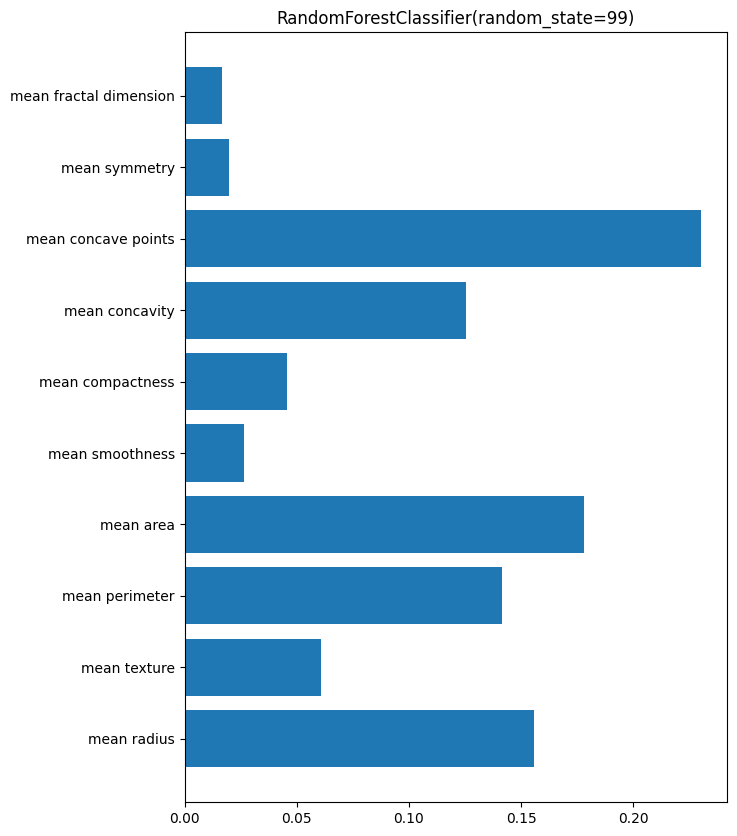

In [54]:
rf=RandomForestClassifier(n_estimators=100,random_state=99)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)  #예측 값
rf_prob=rf.predict_proba(X_test)[:,1] #예측 확률

#적합결과 확인
print('훈련 세트 정확도: {:.3f}'.format(rf.score(X_train,y_train)))
print('테스트 세트 정확도: {:.3f}'.format(rf.score(X_test,y_test)))

#특성 중요도 시각화
fi=rf.feature_importances_
fn=X_names

import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(7,10))
plt.title(rf)
plt.barh(fn,fi)
plt.show()


In [55]:
#+교차검증
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf,X,y,cv=5)
print(scores)
print(scores.mean())

[0.88596491 0.93859649 0.94736842 0.98245614 0.97345133]
0.9455674584691817


In [56]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 모델 생성
rf = RandomForestClassifier(n_estimators=100, random_state=99)

# 교차 검증 수행
cv_results = cross_validate(rf, X, y, cv=5, return_estimator=True)
print(cv_results)

# 각 폴드의 특성 중요도 추출
for i, estimator in enumerate(cv_results['estimator']):
    print(f"Fold {i + 1} 특성 중요도:")
    feature_importances = estimator.feature_importances_
    for j, importance in enumerate(feature_importances):
        print(f"  {X_names[j]}: {importance}")

{'fit_time': array([0.37121415, 0.35223913, 0.36941695, 0.36250949, 0.35796237]), 'score_time': array([0.01619625, 0.01503754, 0.01733518, 0.01413298, 0.01502895]), 'estimator': [RandomForestClassifier(random_state=99), RandomForestClassifier(random_state=99), RandomForestClassifier(random_state=99), RandomForestClassifier(random_state=99), RandomForestClassifier(random_state=99)], 'test_score': array([0.88596491, 0.93859649, 0.94736842, 0.98245614, 0.97345133])}
Fold 1 특성 중요도:
  mean radius: 0.16067597819951648
  mean texture: 0.04874317242147309
  mean perimeter: 0.18045049716661862
  mean area: 0.12828579880244637
  mean smoothness: 0.020495153198491663
  mean compactness: 0.05226713058996633
  mean concavity: 0.11116149503549001
  mean concave points: 0.26723352500905145
  mean symmetry: 0.013546369659247217
  mean fractal dimension: 0.01714087991769881
Fold 2 특성 중요도:
  mean radius: 0.14908756207305604
  mean texture: 0.07075337326615673
  mean perimeter: 0.14820685385656943
  mean

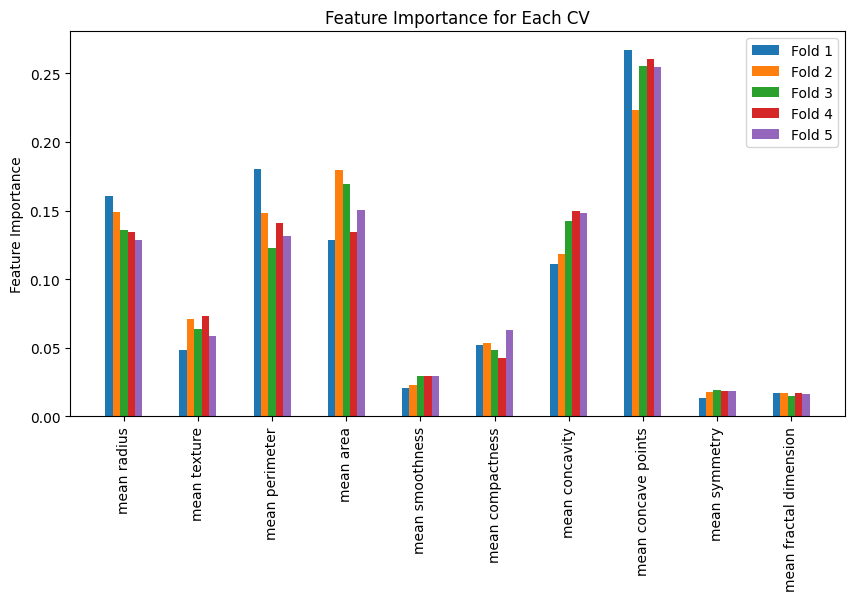

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# 각 cv별 특성 중요도를 저장할 리스트
feature_importances_list = []

# 각 cv별 특성 중요도 추출 및 리스트에 추가
for i, estimator in enumerate(cv_results['estimator']):
    feature_importances = estimator.feature_importances_
    feature_importances_list.append(feature_importances)

# 특성 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 5))
for i, feature_importances in enumerate(feature_importances_list):
    ax.bar(np.arange(len(X_names)) + i * 0.1, feature_importances, width=0.1, label=f"Fold {i + 1}")

ax.set_xticks(np.arange(len(X_names)) + 0.2)
ax.set_xticklabels(X_names, rotation=90)
ax.set_ylabel("Feature Importance")
ax.set_title("Feature Importance for Each CV")
ax.legend()
plt.show()

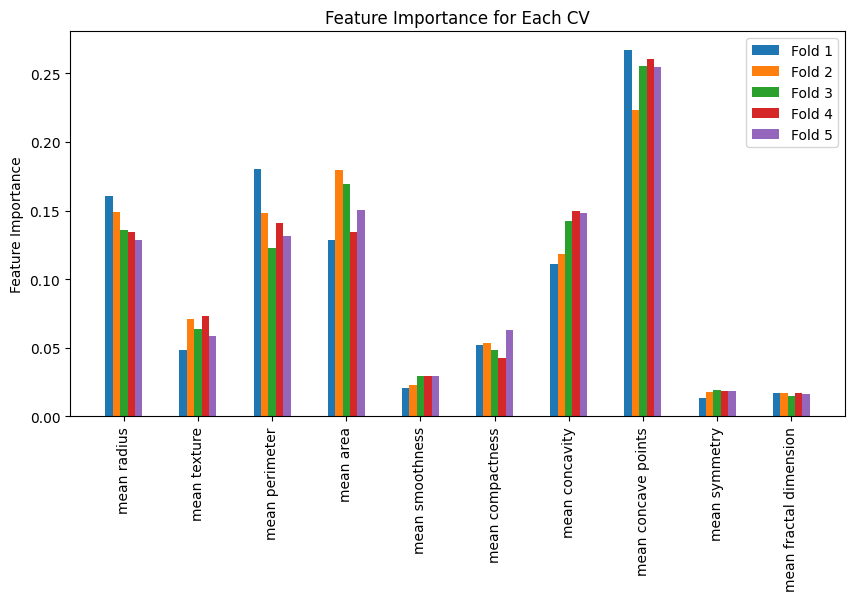

In [70]:
## 간결식

# 특성 중요도 리스트 생성 및 시각화
fig, ax = plt.subplots(figsize=(10, 5))
for i, feature_importances in enumerate([est.feature_importances_ for est in cv_results['estimator']]):
    ax.bar(np.arange(len(X_names)) + i * 0.1, feature_importances, width=0.1, label=f"Fold {i + 1}")

# 그래프 설정
ax.set_xticks(np.arange(len(X_names)) + 0.2)
ax.set_xticklabels(X_names, rotation=90)
ax.set_ylabel("Feature Importance")
ax.set_title("Feature Importance for Each CV")
ax.legend()
plt.show()


In [58]:
#5-2 ROC곡선과 정밀도-재현율 곡선
rf=RandomForestClassifier(n_estimators=40,random_state=40) #n_estimators를 줄임
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
prob=rf.predict_proba(X_test)[:,1]

#분류모형 평가 1
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        53
           1       0.94      0.98      0.96        90

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



In [59]:
#최적 임계값 찾기
from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,thresholds=roc_curve(y_test,prob)
auc=roc_auc_score(y_test,prob)
print('AUC: {:.3f}'.format(auc))

#임곗값 찾기
J=tpr-fpr
idx=np.argmax(J)
best_thresh=thresholds[idx]
best_tpr=tpr[idx]
best_fpr=fpr[idx]
print('최적 임곗값: {:.3f}'.format(best_thresh))

AUC: 0.977
최적 임곗값: 0.600


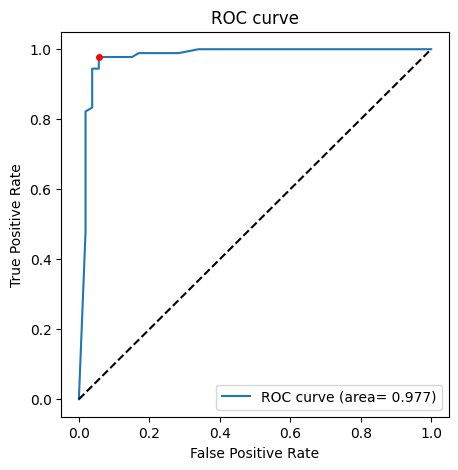

In [60]:
#ROC곡선과 AUC시각화
fig,ax= plt.subplots(figsize=(5,5))
ax.set_title('ROC curve')
ax.plot(fpr,tpr,label='ROC curve (area= %0.3f)'%auc)
ax.plot([0,1],[0,1],'k--')
ax.plot(best_fpr,best_tpr,'ro',markersize=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.show()

In [61]:
#최적의 임곗값으로 분류하기
pred2=prob>best_thresh
print(classification_report(y_test,pred))
print(classification_report(y_test,pred2))

##개선후 f1점수가 올라 분류 성능이 높아짐

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        53
           1       0.94      0.98      0.96        90

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [62]:
#정밀도-재현율 곡선
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_test,prob)
thresholds=list(thresholds)+[1]

idx=np.argmin(np.abs(precisions-recalls))
best_thresh2=thresholds[idx]
print('최적 임곗값: {:.3f}'.format(best_thresh2))

최적 임곗값: 0.625


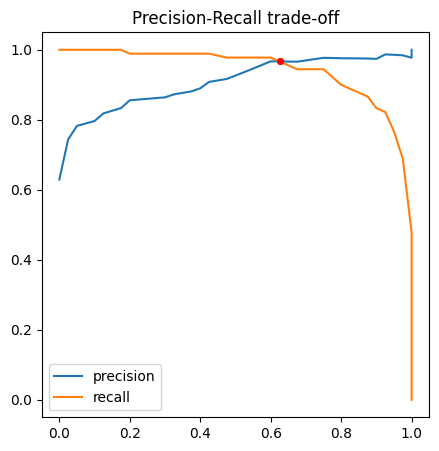

In [63]:
#시각화
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.set_title('Precision-Recall trade-off')
ax.plot(thresholds,precisions,label='precision')
ax.plot(thresholds,recalls,label='recall')
ax.plot(best_thresh2,precisions[idx],'ro',markersize=4)
ax.plot(best_thresh2,recalls[idx],'ro',markersize=4)
ax.legend()
plt.show()

In [64]:
#분류모델 평가
pred3=prob>best_thresh2
print(classification_report(y_test,pred))
print(classification_report(y_test,pred2))
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        53
           1       0.94      0.98      0.96        90

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.97      0.94      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [65]:
#5-3회귀그래프
import seaborn as sns
tips=sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [66]:
import statsmodels.api as sm

X=tips['total_bill']
y=tips['tip']
X=sm.add_constant(X)
model=sm.OLS(y,X)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           6.69e-34
Time:                        06:32:40   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

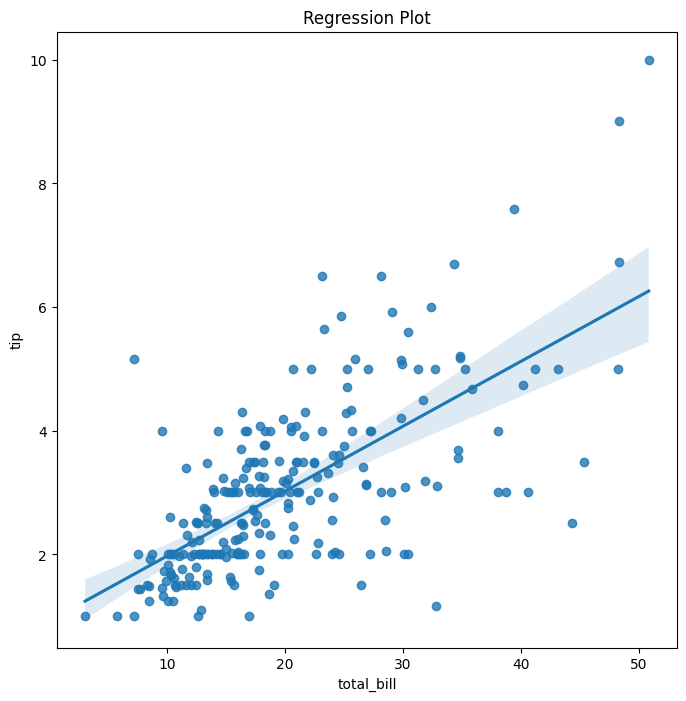

In [67]:
#회귀 그래프 그리기
fig,ax=plt.subplots(figsize=(8,8))
sns.regplot(x='total_bill',y='tip',data=tips,ax=ax)
ax.set_title('Regression Plot')
plt.show()

In [72]:
#5-4 잔차 분석
from scipy.stats import zscore,probplot
resid=result.resid  #잔차
pred=result.fittedvalues  #예측값
sresid=zscore(resid)  #표준화잔차

print('예측값:',pred[:5].values)
print('실제값:',y[:5].values)
print('잔차:',resid[:5].values)
print('표준화잔차:',sresid[:5].values)

예측값: [2.70463616 2.00622312 3.12683472 3.40725019 3.5028225 ]
실제값: [1.01 1.66 3.5  3.31 3.61]
잔차: [-1.69463616 -0.34622312  0.37316528 -0.09725019  0.1071775 ]
표준화잔차: [-1.66491673 -0.34015129  0.36662094 -0.09554467  0.10529789]


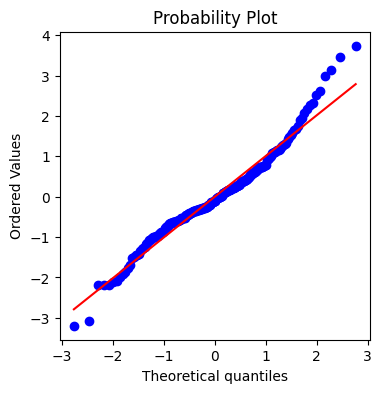

In [76]:
#정규성 확인
fig,ax=plt.subplots(figsize=(4,4))
probplot(resid,plot=ax)
plt.show()

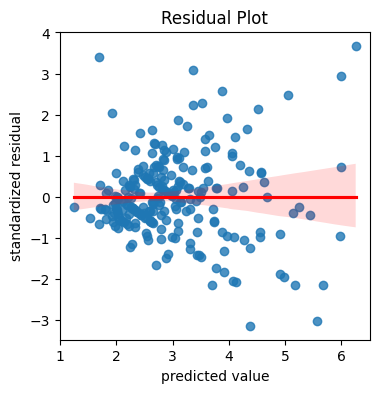

In [78]:
#등분산성 확인
fig,ax=plt.subplots(figsize=(4,4))
sns.regplot(x=pred,y=sresid,line_kws={'color':'red'},ax=ax)
ax.set_xlabel('predicted value')
ax.set_ylabel('standardized residual')
ax.set_title('Residual Plot')
plt.show()

In [79]:
#5-5 계층적 군집 시각화
iris=sns.load_dataset('iris')
X=iris.drop('species',axis=1)
y=iris['species']
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [81]:
#데이터표준화
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
df=pd.DataFrame(X_scaled,columns=X.columns)
print(df)

     sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


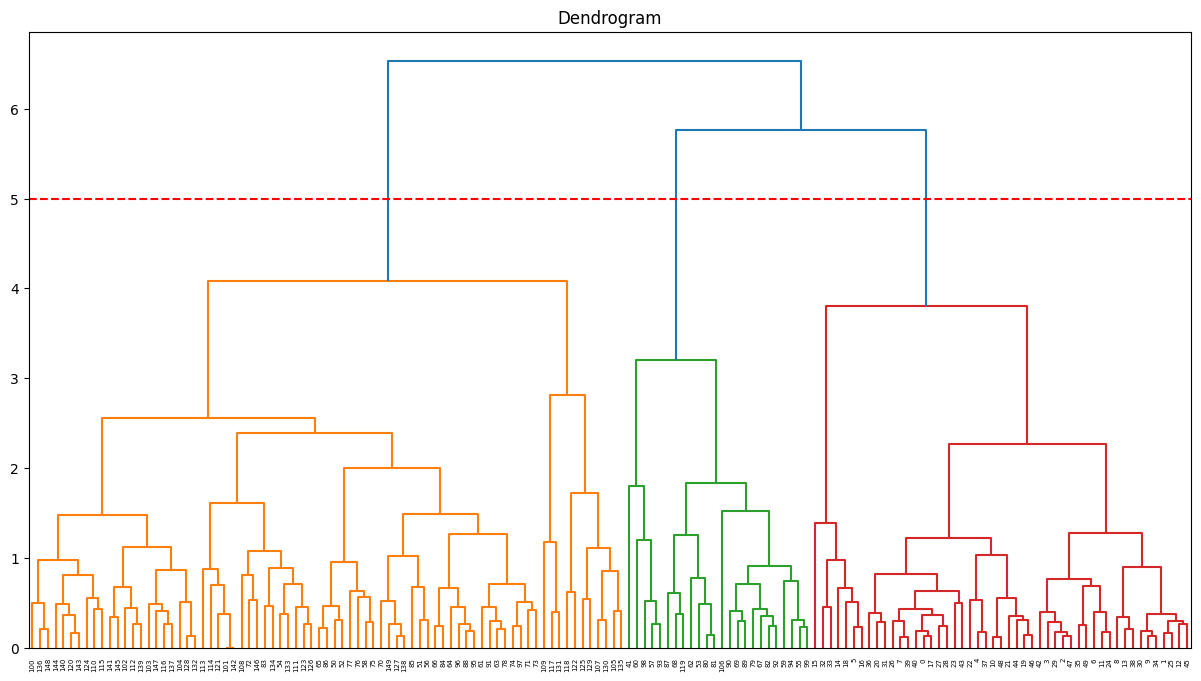

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
#군집화 상세내역 매트릭스
Z=linkage(df,method='complete')
#method : 'single', 'average', 'complete', 'ward'

distance_setting=5
fig,ax=plt.subplots(figsize=(15,8))
dendrogram(Z,labels=df.index,ax=ax,color_threshold=distance_setting)  #시각화
#임계점
ax.axhline(y=distance_setting,color='r',linestyle='--')
ax.set_title('Dendrogram')
plt.show()

In [86]:
#덴드로그램을 통한 군집개수 결정 & cut_tree로 라벨 지정
n_clusters=3
clusters=cut_tree(Z,n_clusters=n_clusters).reshape(-1)
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 2 1 2 2 2 2 1 1 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


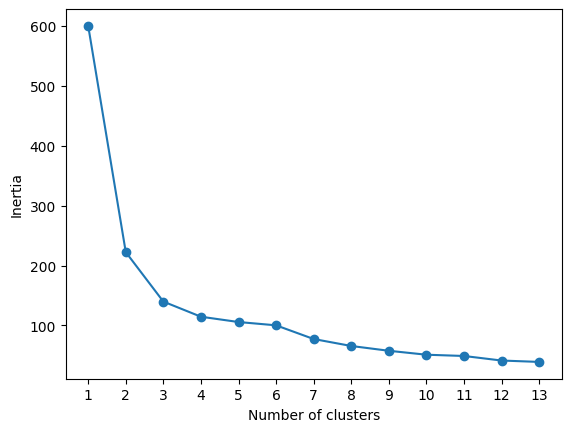

In [90]:
#5-6  비계층적 군집 시각화
from sklearn.cluster import KMeans
I=[]
for k in range(1,14):
  kmeans=KMeans(n_clusters=k,random_state=99)
  kmeans.fit(df)
  I.append(kmeans.inertia_) #오차제곱합

plt.plot(range(1,14),I,marker='o')
plt.xticks(range(1,14))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

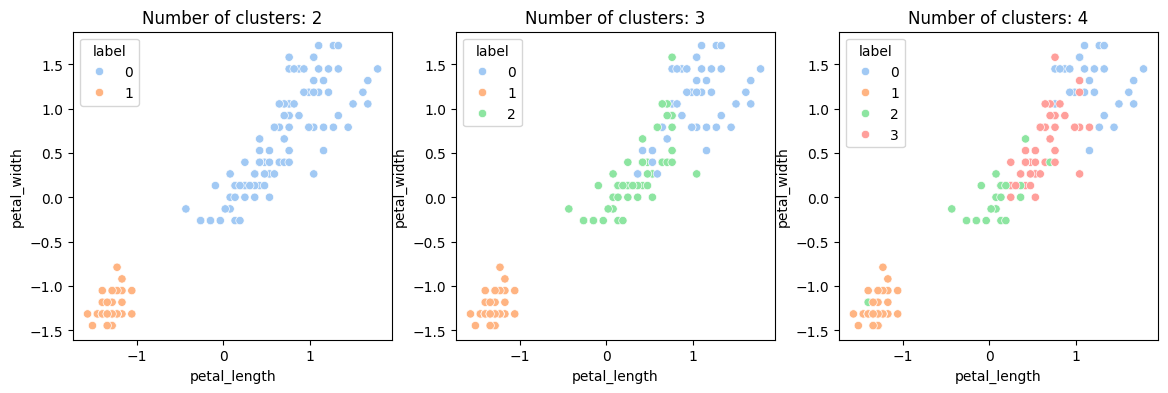

In [94]:
#산점도
n_list=[2,3,4]  #군집 개수 후보군
fig,axes=plt.subplots(1,3,figsize=(14,4))
for ax,n in zip(axes,n_list):
  kmeans=KMeans(n_clusters=n,random_state=99)
  kmeans.fit(df)
  copied=df.copy()
  copied['label']=kmeans.labels_
  sns.scatterplot(x='petal_length',y='petal_width',hue='label',data=copied,ax=ax,palette='pastel')
  ax.set_title('Number of clusters: {}'.format(n))
plt.show()

In [95]:
#5-7 실루엣 다이어그램
km=KMeans(n_clusters=3,random_state=99)
km.fit(df)
labels=km.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [98]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouttet_avg=silhouette_score(df,labels)
sample_silhouette_values=silhouette_samples(df,labels)
print('평균 실루엣 점수: {:.3f}'.format(silhouttet_avg))

평균 실루엣 점수: 0.460


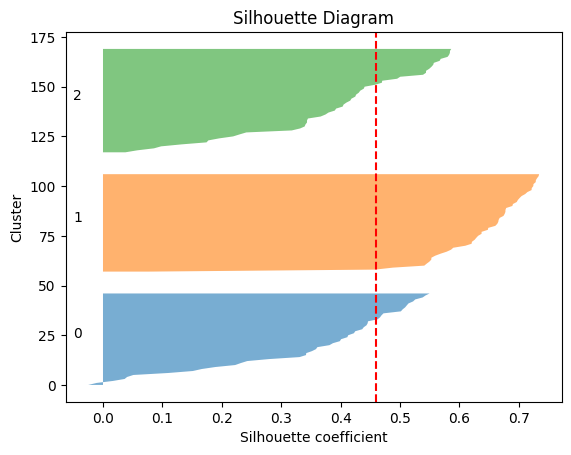

In [106]:
y_lower=0
for i in range(3):
  #군집별 실루엣 점수 추출 & 정렬
  sil_values=sample_silhouette_values[labels==i]
  sil_values.sort()

  #군집별 막대 설정
  size_cluster_i = sil_values.shape[0]
  y_upper = y_lower + size_cluster_i

  plt.fill_betweenx(np.arange(y_lower, y_upper), sil_values, alpha=0.6)
  plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

plt.axvline(x=silhouttet_avg,color='red',linestyle='--')
plt.ylabel('Cluster')
plt.title('Silhouette Diagram')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()